# Part 0. Prepare the data

In [23]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
# Flatten and standarize values
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float')/255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float')/255
train_labels = ku.to_categorical(train_labels)
test_labels = ku.to_categorical(test_labels)

In [6]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.figure(0)
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()

def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.figure(1)
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')

In [7]:
filepath = 'my_model_file.hdf5'
callbacks = [
        EarlyStopping(
            monitor = 'val_loss',
            patience = 1
        ),
        ModelCheckpoint(
            filepath = filepath,
            monitor = 'val_loss',
            save_best_only = True
        )
]

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 18s 296us/step - loss: 0.3388 - accuracy: 0.9296 - val_loss: 0.1127 - val_accuracy: 0.9805
Epoch 2/40
60000/60000 [==============================] - 18s 294us/step - loss: 0.1522 - accuracy: 0.9708 - val_loss: 0.0777 - val_accuracy: 0.9874
Epoch 3/40
60000/60000 [==============================] - 17s 289us/step - loss: 0.1232 - accuracy: 0.9755 - val_loss: 0.0704 - val_accuracy: 0.9886
Epoch 4/40
60000/60000 [==============================] - 17s 288us/step - loss: 0.1137 - accuracy: 0.9779 - val_loss: 0.0680 - val_accuracy: 0.9883
Epoch 5/40
60000/60000 [==============================] - 17s 290us/step - loss: 0.1070 - accuracy: 0.9790 - val_loss: 0.0789 - val_accuracy: 0.9835


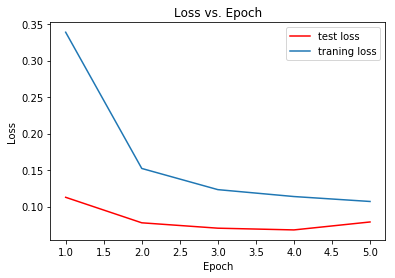

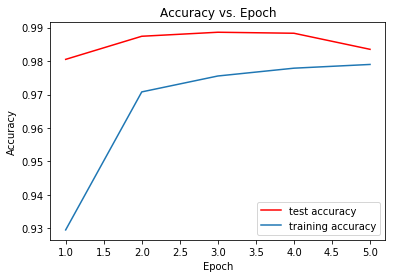

In [11]:
callbacks = [EarlyStopping(monitor='val_loss', patience=1),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

baseline = models.Sequential()
baseline.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
baseline.add(layers.MaxPooling2D((2, 2)))
baseline.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
baseline.add(layers.MaxPooling2D((2, 2)))
baseline.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))

baseline.add(layers.Flatten())
baseline.add(layers.Dense(64, activation = 'relu',
                        kernel_regularizer=regularizers.l2(0.01)))
baseline.add(Dropout(0.5))
baseline.add(layers.Dense(10, activation = 'softmax'))

baseline.compile(optimizer = 'RMSprop', loss='categorical_crossentropy', metrics= ['accuracy'])
baseline_history = baseline.fit(train_images, 
                                  train_labels, 
                                  epochs=40, 
                                  validation_data=(test_images, test_labels), 
                                  callbacks=callbacks)

plot_loss(baseline_history)
plot_accuracy(baseline_history)

## Part 1
A network that uses tiling of the convolutional operator

In [10]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, kernel_size=(2,2), padding='valid', activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(layers.Conv2D(64, kernel_size=(2,2), padding='valid', activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(layers.Conv2D(64, kernel_size=(2,2), padding='valid', activation='relu'))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn.add(Dropout(0.5))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(train_images, 
                  train_labels, 
                  epochs=40,
                  validation_data=(test_images, test_labels), 
                  callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 16s 262us/step - loss: 0.4272 - accuracy: 0.9100 - val_loss: 0.1373 - val_accuracy: 0.9788
Epoch 2/40
60000/60000 [==============================] - 15s 249us/step - loss: 0.2005 - accuracy: 0.9593 - val_loss: 0.1154 - val_accuracy: 0.9794
Epoch 3/40
60000/60000 [==============================] - 15s 249us/step - loss: 0.1663 - accuracy: 0.9662 - val_loss: 0.0927 - val_accuracy: 0.9844
Epoch 4/40
60000/60000 [==============================] - 15s 249us/step - loss: 0.1505 - accuracy: 0.9697 - val_loss: 0.0855 - val_accuracy: 0.9854
Epoch 5/40
60000/60000 [==============================] - 15s 249us/step - loss: 0.1384 - accuracy: 0.9720 - val_loss: 0.0860 - val_accuracy: 0.9835


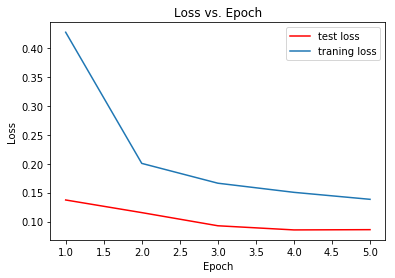

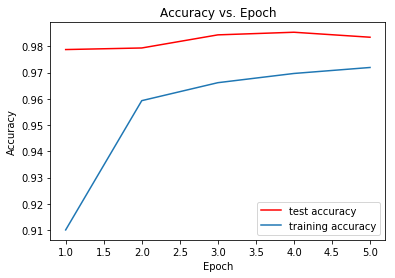

In [12]:
plot_loss(history)
plot_accuracy(history)

### Questions

The layer units between both models are the same with the exception of the operation units which for the baseline is 3x3 and for this model is 2x2. The dense layers are identical. The performance of this layer is worse than the baseline but only by a few cents of a point.

## Part 2
A network that uses a convolutional operator with a larger span

In [33]:
cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1), padding='valid'))
cnn2.add(layers.MaxPooling2D(2, 2))
cnn2.add(layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='valid'))
cnn2.add(layers.MaxPooling2D(2, 2))
cnn2.add(layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'))

cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn2.add(Dropout(0.5))
cnn2.add(layers.Dense(10, activation='softmax'))

cnn2.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = cnn2.fit(train_images, 
                  train_labels, 
                  epochs=40, 
                  validation_data=(test_images, test_labels), 
                  callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 15s 249us/step - loss: 0.3456 - accuracy: 0.9327 - val_loss: 0.0924 - val_accuracy: 0.9832
Epoch 2/40
60000/60000 [==============================] - 15s 244us/step - loss: 0.1054 - accuracy: 0.9792 - val_loss: 0.0679 - val_accuracy: 0.9856
Epoch 3/40
60000/60000 [==============================] - 15s 243us/step - loss: 0.0817 - accuracy: 0.9835 - val_loss: 0.0606 - val_accuracy: 0.9866
Epoch 4/40
60000/60000 [==============================] - 15s 244us/step - loss: 0.0702 - accuracy: 0.9857 - val_loss: 0.0438 - val_accuracy: 0.9907
Epoch 5/40
60000/60000 [==============================] - 15s 252us/step - loss: 0.0622 - accuracy: 0.9871 - val_loss: 0.0806 - val_accuracy: 0.9830


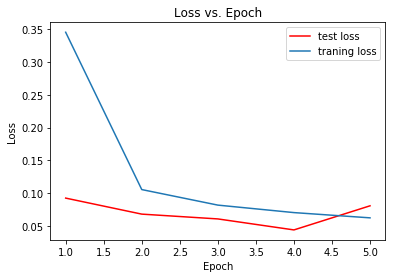

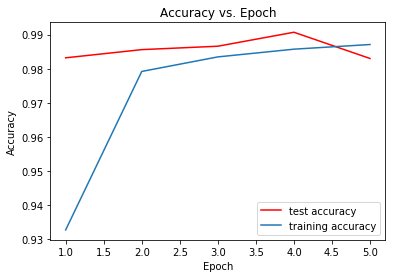

In [34]:
plot_loss(history2)
plot_accuracy(history2)

### Questions

The layer units between both models are the same with the exception of the operation units which for the baseline is 3x3 and for this model is 5x5. Because the high downsampling the last layer was required to use padding. The dense layers are identical. The performance of this model is significantly better than the baseline one with an accuracy of 0.9907.

## Part 3
A network with deeper covolutional layer

In [44]:
cnn3 = models.Sequential()
cnn3.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1), padding='valid'))
cnn3.add(layers.MaxPooling2D(2, 2))
cnn3.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid'))
cnn3.add(layers.MaxPooling2D(2, 2))
cnn3.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid'))
cnn3.add(layers.MaxPooling2D(2, 2))
cnn3.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))

cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn3.add(Dropout(0.5))
cnn3.add(layers.Dense(10, activation='softmax'))

cnn3.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = cnn3.fit(train_images, 
                  train_labels, 
                  epochs=40, 
                  validation_data=(test_images, test_labels), 
                  callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 16s 263us/step - loss: 0.5830 - accuracy: 0.8444 - val_loss: 0.1844 - val_accuracy: 0.9619
Epoch 2/40
60000/60000 [==============================] - 15s 250us/step - loss: 0.1995 - accuracy: 0.9553 - val_loss: 0.1175 - val_accuracy: 0.9727
Epoch 3/40
60000/60000 [==============================] - 15s 249us/step - loss: 0.1412 - accuracy: 0.9692 - val_loss: 0.0984 - val_accuracy: 0.9772
Epoch 4/40
60000/60000 [==============================] - 15s 248us/step - loss: 0.1134 - accuracy: 0.9750 - val_loss: 0.0918 - val_accuracy: 0.9800
Epoch 5/40
60000/60000 [==============================] - 15s 249us/step - loss: 0.0991 - accuracy: 0.9787 - val_loss: 0.0850 - val_accuracy: 0.9821
Epoch 6/40
60000/60000 [==============================] - 15s 250us/step - loss: 0.0905 - accuracy: 0.9803 - val_loss: 0.0821 - val_accuracy: 0.9823
Epoch 7/40
60000/60000 [==============================] 

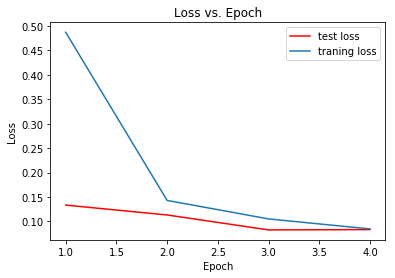

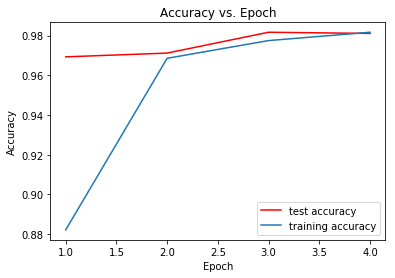

In [41]:
plot_loss(history3)
plot_accuracy(history3)

### Questions

The layer units between both models are the same, the only difference is the extra convolutional layer in this particular model. Because the high downsampling the last layer was required to use padding. The dense layers are identical. The performance of this model is midly worse than the baseline layer, decreasing by a few cents of a point.